In [88]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [89]:
for i in range(1):
    if i==0:
        train = pd.read_pickle('salida/nuevo4h/RTEGLUE/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4h/RTEGLUE/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [90]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,1.784641,0.000000,0.000000,0.000000,0.000000,0.000000,4.702695,0.000000,1.000000,...,0,6,1.000000,0.000000,0,,0,,1.000000,not_entailment
1,0.793268,2.578621,2.608111,3.808101,0.003099,0.685379,0.172401,4.532128,0.001002,0.853577,...,1,22,0.375000,0.437117,0,,0,,0.333333,entailment
2,1.220917,2.369263,1.800971,3.938110,0.005212,0.254686,0.063637,4.477281,0.000753,0.850937,...,1,21,1.000000,0.232301,0,,0,,0.000000,entailment
3,1.000016,2.055348,1.877640,3.872732,0.004151,0.363920,0.055680,4.334662,0.000853,0.818263,...,2,31,0.857143,0.061400,0,,0,,0.500000,entailment
4,0.999996,1.527320,1.058663,4.032123,0.003554,0.284289,0.036284,4.351514,0.001307,0.722905,...,1,44,0.166667,0.185495,0,,0,,0.500000,not_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,0.000000,1.758312,0.000000,0.000000,0.000000,0.000000,0.000000,4.702695,0.000000,1.000000,...,0,10,0.400000,0.000000,0,,0,,1.000000,not_entailment
2486,0.000000,1.655580,0.000000,0.000000,0.000000,0.000000,0.000000,3.374379,0.000794,0.603103,...,0,73,0.750000,0.000000,0,,0,,0.333333,entailment
2487,1.109871,2.747323,1.677048,3.999374,0.005211,0.383941,0.035572,4.273806,0.002357,0.654193,...,2,19,0.400000,0.509271,0,,0,,0.333333,not_entailment
2488,0.000000,1.975932,0.000000,0.000000,0.000000,0.000000,0.000000,4.500668,0.000785,0.829175,...,0,72,1.000000,0.000000,0,,0,,0.000000,entailment


In [91]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'verbT', 'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

<Axes: title={'center': 'overlap_ent'}, xlabel='clases'>

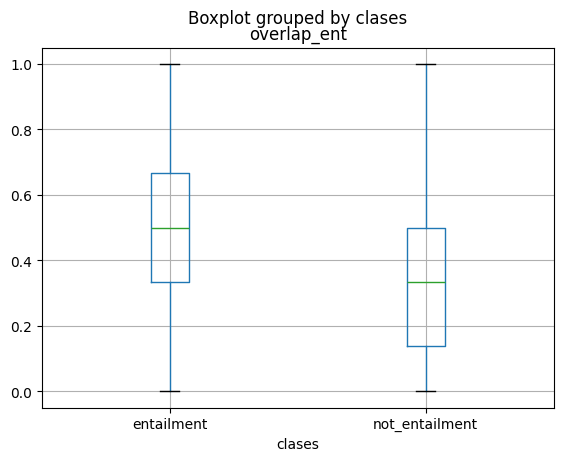

In [92]:
train.boxplot(by="clases",column="overlap_ent")

## Eliminar características

In [ ]:
# #train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
# train["mutinf"]=train["mutinf_t"]-train["mutinf"]  esta
# #train["max_infox"]=train["max_info"]/train["max_info_t"]
# #train["max_infoxx"]=train["max_info_t"]-train["max_info"] max info t
train["meartsx"]=train["mearts"]/train["mearts_t"]

# #train["entropiasx"]=train["entropias"]/train["entropia_total"]
# train["entropias"]=train["entropia_total"]-train["entropias"]  
# # train["sumasx"]=train["sumas"]/train["sumas_t"]
# train["sumas"]=train["sumas_t"]-train["sumas"]  
# train["list_m"]=train["list_m"]/train["list_M"]  
# #train["list_mxx"]=train["list_M"]-train["list_m"]
# train=train.drop(["verbT","verbH","entropia_total","mutinf_t","max_info",
#                    "mearts_t","sumas_t","list_M","mearts"],axis=1)

array([<Axes: title={'center': 'mearts'}, xlabel='clases'>,
       <Axes: title={'center': 'mearts_t'}, xlabel='clases'>],
      dtype=object)

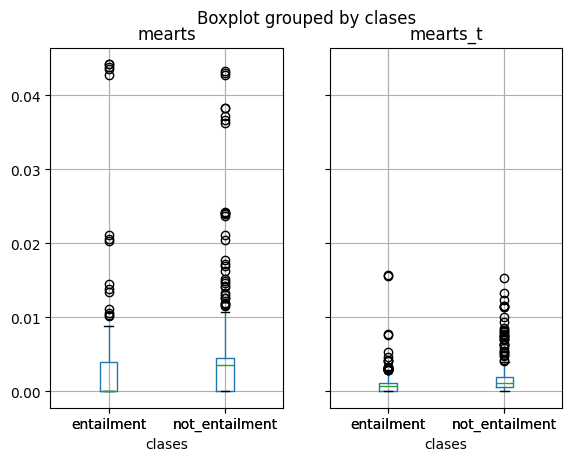

In [130]:
train.boxplot(by="clases",column=["mearts","mearts_t"])

KeyError: 'Column not found: meartsx'

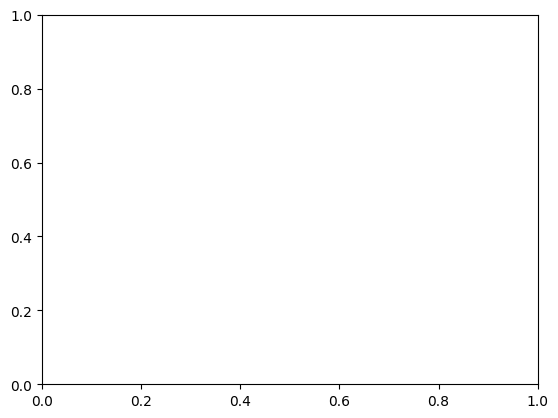

In [ ]:
train.boxplot(by="clases",column=["meartsx"])

In [ ]:
checar=["mearts","mearts_t"]

In [ ]:
import scipy.stats as stats
for c in checar:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="not_entailment")][c]
    grupo_b = train[(train['clases']=="entailment")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"not_entailment-entailment")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"not_entailment-entailment")

Hay una diferencia significativa entre los grupos. KL_divergence 8.021859712669955e-05 not_entailment-entailment


In [ ]:
for c in checar:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="not_entailment")][c]
    grupo_b = train[(train['clases']=="entailment")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.mannwhitneyu(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"not_entailment-entailment")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"not_entailment-entailment")

Hay una diferencia significativa entre los grupos. KL_divergence 1.012343897153892e-15 not_entailment-entailment


In [8]:
train=train.drop(["verbT","verbH"],axis=1)

In [9]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,0.000000,1.784641,0.000000,0.000000,0.000000,0.000000,0.000000,4.702695,0.000000,1.000000,...,0.000000,5,0,6,1.000000,0.000000,0,0,1.000000,not_entailment
1,0.793268,2.578621,2.608111,3.808101,0.003099,0.685379,0.172401,4.532128,0.001002,0.853577,...,0.543564,8,1,22,0.375000,0.437117,0,0,0.333333,entailment
2,1.220917,2.369263,1.800971,3.938110,0.005212,0.254686,0.063637,4.477281,0.000753,0.850937,...,0.721928,5,1,21,1.000000,0.232301,0,0,0.000000,entailment
3,1.000016,2.055348,1.877640,3.872732,0.004151,0.363920,0.055680,4.334662,0.000853,0.818263,...,0.863121,7,2,31,0.857143,0.061400,0,0,0.500000,entailment
4,0.999996,1.527320,1.058663,4.032123,0.003554,0.284289,0.036284,4.351514,0.001307,0.722905,...,1.251629,6,1,44,0.166667,0.185495,0,0,0.500000,not_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,0.000000,1.758312,0.000000,0.000000,0.000000,0.000000,0.000000,4.702695,0.000000,1.000000,...,0.000000,5,0,10,0.400000,0.000000,0,0,1.000000,not_entailment
2486,0.000000,1.655580,0.000000,0.000000,0.000000,0.000000,0.000000,3.374379,0.000794,0.603103,...,0.000000,4,0,73,0.750000,0.000000,0,0,0.333333,entailment
2487,1.109871,2.747323,1.677048,3.999374,0.005211,0.383941,0.035572,4.273806,0.002357,0.654193,...,0.970951,5,2,19,0.400000,0.509271,0,0,0.333333,not_entailment
2488,0.000000,1.975932,0.000000,0.000000,0.000000,0.000000,0.000000,4.500668,0.000785,0.829175,...,0.000000,7,0,72,1.000000,0.000000,0,0,0.000000,entailment


In [10]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases


In [11]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'negH', 'overlap_ent', 'clases'],
      dtype='object')

In [12]:
#train=train.drop(["verbT","verbH"],axis=1)

In [13]:
#train=train[["max_info_t","list_m","entropia_relaciones","mutinf_t","distancias","Jaro-Winkler_rit","entropias","mearts_t",
#             "diferencias","list_comp","clases"]]

In [14]:
# train=train[["negT","list_m","entropia_relaciones","mutinf","distancias","Jaro-Winkler_rit","entropias","sumas",
#              "diferencias","list_comp","clases"]]

In [15]:
#train=train[["mutinf","mearts","max_info","sumas","diferencias","entropia_relaciones","Jaro-Winkler_rit","overlap_ent","clases"]]
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,0.000000,1.784641,0.000000,0.000000,0.000000,0.000000,0.000000,4.702695,0.000000,1.000000,...,0.000000,5,0,6,1.000000,0.000000,0,0,1.000000,not_entailment
1,0.793268,2.578621,2.608111,3.808101,0.003099,0.685379,0.172401,4.532128,0.001002,0.853577,...,0.543564,8,1,22,0.375000,0.437117,0,0,0.333333,entailment
2,1.220917,2.369263,1.800971,3.938110,0.005212,0.254686,0.063637,4.477281,0.000753,0.850937,...,0.721928,5,1,21,1.000000,0.232301,0,0,0.000000,entailment
3,1.000016,2.055348,1.877640,3.872732,0.004151,0.363920,0.055680,4.334662,0.000853,0.818263,...,0.863121,7,2,31,0.857143,0.061400,0,0,0.500000,entailment
4,0.999996,1.527320,1.058663,4.032123,0.003554,0.284289,0.036284,4.351514,0.001307,0.722905,...,1.251629,6,1,44,0.166667,0.185495,0,0,0.500000,not_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,0.000000,1.758312,0.000000,0.000000,0.000000,0.000000,0.000000,4.702695,0.000000,1.000000,...,0.000000,5,0,10,0.400000,0.000000,0,0,1.000000,not_entailment
2486,0.000000,1.655580,0.000000,0.000000,0.000000,0.000000,0.000000,3.374379,0.000794,0.603103,...,0.000000,4,0,73,0.750000,0.000000,0,0,0.333333,entailment
2487,1.109871,2.747323,1.677048,3.999374,0.005211,0.383941,0.035572,4.273806,0.002357,0.654193,...,0.970951,5,2,19,0.400000,0.509271,0,0,0.333333,not_entailment
2488,0.000000,1.975932,0.000000,0.000000,0.000000,0.000000,0.000000,4.500668,0.000785,0.829175,...,0.000000,7,0,72,1.000000,0.000000,0,0,0.000000,entailment


In [16]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [17]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [18]:
train_m

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
distancias,1.000000,0.110767,0.925723,0.971734,0.633742,0.764391,0.708882,0.027755,0.479377,-0.417213,...,0.031656,0.768236,0.235413,0.591861,-0.147350,-0.329673,0.553506,-0.029599,0.078308,-0.274705
entropia_total,0.110767,1.000000,0.143727,0.088257,0.067220,0.128831,0.236971,0.647145,0.047576,0.458810,...,0.014362,0.042919,0.091302,-0.020220,-0.254422,0.041737,0.161706,-0.066519,0.020778,0.059242
entropias,0.925723,0.143727,1.000000,0.958159,0.489370,0.891682,0.828916,0.007193,0.385461,-0.390418,...,0.026078,0.751954,0.250959,0.600208,-0.101917,-0.321151,0.467582,-0.021474,0.073668,-0.270572
mutinf,0.971734,0.088257,0.958159,1.000000,0.503083,0.836559,0.748699,0.021205,0.372198,-0.411035,...,0.024129,0.766823,0.227031,0.585092,-0.107130,-0.321588,0.508882,-0.020986,0.077366,-0.269328
mearts,0.633742,0.067220,0.489370,0.503083,1.000000,0.395921,0.365285,-0.064767,0.763624,-0.292695,...,0.036725,0.487331,0.174688,0.389873,-0.126756,-0.216980,0.516197,-0.043013,0.026004,-0.176297
max_info,0.764391,0.128831,0.891682,0.836559,0.395921,1.000000,0.844762,0.011939,0.303388,-0.257712,...,0.005659,0.633856,0.162094,0.453706,-0.013228,-0.263243,0.418923,0.009434,0.082610,-0.219732
sumas,0.708882,0.236971,0.828916,0.748699,0.365285,0.844762,1.000000,0.036957,0.289013,-0.230692,...,0.010352,0.571175,0.146045,0.399657,-0.167648,-0.238353,0.488715,-0.036131,0.051245,-0.189036
mutinf_t,0.027755,0.647145,0.007193,0.021205,-0.064767,0.011939,0.036957,1.000000,-0.152634,0.740268,...,-0.007623,-0.109011,0.026061,-0.130896,-0.019278,0.138722,-0.051942,0.013237,0.005480,0.119305
mearts_t,0.479377,0.047576,0.385461,0.372198,0.763624,0.303388,0.289013,-0.152634,1.000000,-0.522837,...,0.094791,0.526431,0.143303,0.502745,-0.138087,-0.336822,0.247087,-0.035805,0.031459,-0.359782
max_info_t,-0.417213,0.458810,-0.390418,-0.411035,-0.292695,-0.257712,-0.230692,0.740268,-0.522837,1.000000,...,-0.053686,-0.533552,-0.122760,-0.553171,0.086881,0.377665,-0.145786,0.027379,-0.034731,0.382599


<Axes: >

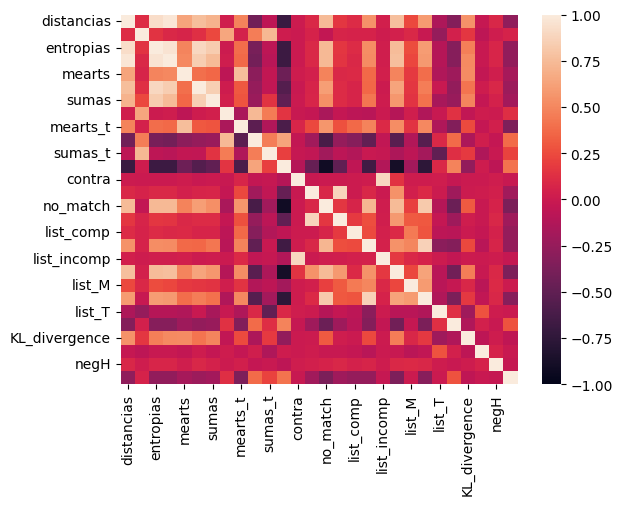

In [19]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [20]:
train_m

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
distancias,1.000000,0.110767,0.925723,0.971734,0.633742,0.764391,0.708882,0.027755,0.479377,-0.417213,...,0.031656,0.768236,0.235413,0.591861,-0.147350,-0.329673,0.553506,-0.029599,0.078308,-0.274705
entropia_total,0.110767,1.000000,0.143727,0.088257,0.067220,0.128831,0.236971,0.647145,0.047576,0.458810,...,0.014362,0.042919,0.091302,-0.020220,-0.254422,0.041737,0.161706,-0.066519,0.020778,0.059242
entropias,0.925723,0.143727,1.000000,0.958159,0.489370,0.891682,0.828916,0.007193,0.385461,-0.390418,...,0.026078,0.751954,0.250959,0.600208,-0.101917,-0.321151,0.467582,-0.021474,0.073668,-0.270572
mutinf,0.971734,0.088257,0.958159,1.000000,0.503083,0.836559,0.748699,0.021205,0.372198,-0.411035,...,0.024129,0.766823,0.227031,0.585092,-0.107130,-0.321588,0.508882,-0.020986,0.077366,-0.269328
mearts,0.633742,0.067220,0.489370,0.503083,1.000000,0.395921,0.365285,-0.064767,0.763624,-0.292695,...,0.036725,0.487331,0.174688,0.389873,-0.126756,-0.216980,0.516197,-0.043013,0.026004,-0.176297
max_info,0.764391,0.128831,0.891682,0.836559,0.395921,1.000000,0.844762,0.011939,0.303388,-0.257712,...,0.005659,0.633856,0.162094,0.453706,-0.013228,-0.263243,0.418923,0.009434,0.082610,-0.219732
sumas,0.708882,0.236971,0.828916,0.748699,0.365285,0.844762,1.000000,0.036957,0.289013,-0.230692,...,0.010352,0.571175,0.146045,0.399657,-0.167648,-0.238353,0.488715,-0.036131,0.051245,-0.189036
mutinf_t,0.027755,0.647145,0.007193,0.021205,-0.064767,0.011939,0.036957,1.000000,-0.152634,0.740268,...,-0.007623,-0.109011,0.026061,-0.130896,-0.019278,0.138722,-0.051942,0.013237,0.005480,0.119305
mearts_t,0.479377,0.047576,0.385461,0.372198,0.763624,0.303388,0.289013,-0.152634,1.000000,-0.522837,...,0.094791,0.526431,0.143303,0.502745,-0.138087,-0.336822,0.247087,-0.035805,0.031459,-0.359782
max_info_t,-0.417213,0.458810,-0.390418,-0.411035,-0.292695,-0.257712,-0.230692,0.740268,-0.522837,1.000000,...,-0.053686,-0.533552,-0.122760,-0.553171,0.086881,0.377665,-0.145786,0.027379,-0.034731,0.382599


In [21]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="mutinf")

In [22]:
# RTE3
y_train=[]
for i in y_:
    if i == "entailment":
        y_train.append(1)
    else:
        y_train.append(0)

In [23]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

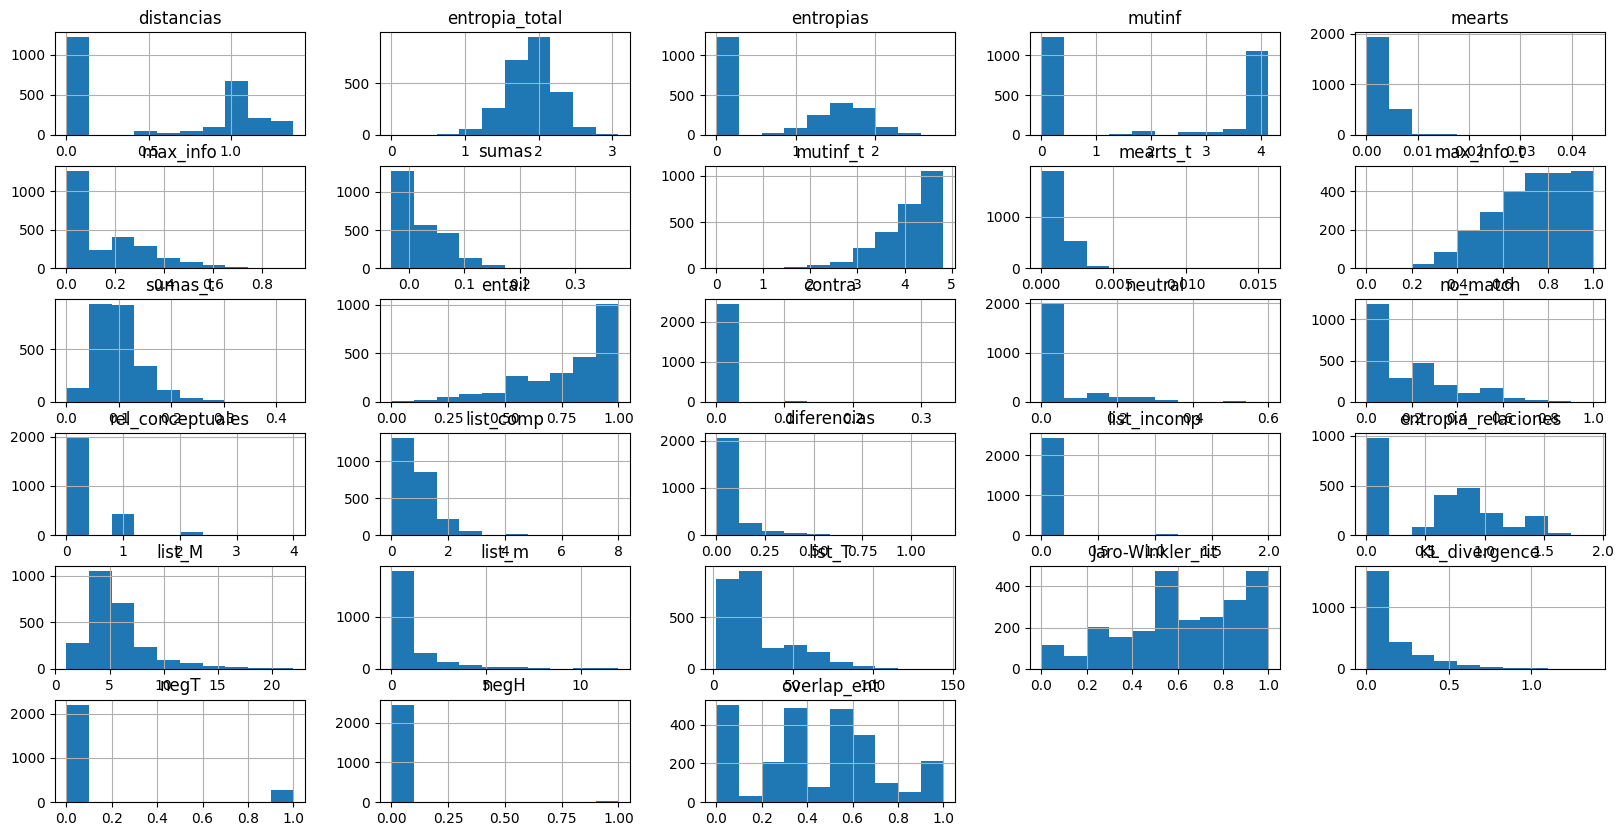

In [24]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [25]:
for i in range(1):
    if i==0:
        test = pd.read_pickle('salida/nuevo4h/RTEGLUE/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4h/RTEGLUE/DEV_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [26]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,2.306973,0.000000,0.000000,0.000000,0.000000,0.000000,4.330794,0.001830,0.585814,...,0,15,1.000000,0.000000,0,,0,,0.333333,not_entailment
1,0.000000,2.290259,0.000000,0.000000,0.000000,0.000000,0.000000,4.222697,0.001304,0.741646,...,0,18,0.250000,0.000000,0,,0,,0.333333,entailment
2,0.000000,1.602743,0.000000,0.000000,0.000000,0.000000,0.000000,3.939812,0.000380,0.785368,...,0,69,0.857143,0.000000,0,,0,,0.500000,not_entailment
3,0.999998,1.868930,1.502919,3.943602,0.003980,0.200366,0.033212,4.294518,0.001715,0.591069,...,3,57,0.571429,0.083613,0,,0,,0.500000,not_entailment
4,0.000000,1.849475,0.000000,0.000000,0.000000,0.000000,0.000000,4.566742,0.001130,0.784733,...,0,15,0.714286,0.000000,0,,0,,0.750000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1.154425,2.073195,2.054585,3.941485,0.005496,0.333671,0.079486,4.650021,0.000689,0.888945,...,1,12,0.500000,0.326422,0,,0,,0.666667,entailment
273,0.000000,1.718790,0.000000,0.000000,0.000000,0.000000,0.000000,4.562471,0.000491,0.956359,...,0,25,0.500000,0.000000,0,,0,,0.333333,entailment
274,0.000000,1.745348,0.000000,0.000000,0.000000,0.000000,0.000000,3.795774,0.000000,0.800000,...,0,33,1.000000,0.000000,0,,0,,0.800000,entailment
275,0.999974,1.812120,1.738149,3.828442,0.005430,0.153807,0.024264,3.820542,0.000576,0.736258,...,1,13,0.142857,0.309501,0,,0,,0.800000,entailment


In [27]:
# #train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
# test["mutinf"]=test["mutinf_t"]-test["mutinf"]
# #train["max_infox"]=train["max_info"]/train["max_info_t"]
# test["max_info"]=test["max_info_t"]-test["max_info"]
# #train["mearts"]=train["mearts"]/train["mearts_t"]
# #train["entropiasx"]=train["entropias"]/train["entropia_total"]
# test["entropias"]=test["entropia_total"]-test["entropias"]
# #train["sumasx"]=train["sumas"]/train["sumas_t"]
# test["sumas"]=test["sumas_t"]-test["sumas"]
# test["list_m"]=test["list_m"]/test["list_M"]
# #train["list_mxx"]=train["list_M"]-train["list_m"]
# test=test.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
#                   "mearts_t","sumas_t","list_M","mearts"],axis=1)

In [28]:
test=test.drop(["verbT","verbH"],axis=1)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,0.000000,2.306973,0.000000,0.000000,0.000000,0.000000,0.000000,4.330794,0.001830,0.585814,...,0.000000,4,0,15,1.000000,0.000000,0,0,0.333333,not_entailment
1,0.000000,2.290259,0.000000,0.000000,0.000000,0.000000,0.000000,4.222697,0.001304,0.741646,...,0.811278,4,0,18,0.250000,0.000000,0,0,0.333333,entailment
2,0.000000,1.602743,0.000000,0.000000,0.000000,0.000000,0.000000,3.939812,0.000380,0.785368,...,0.591673,7,0,69,0.857143,0.000000,0,0,0.500000,not_entailment
3,0.999998,1.868930,1.502919,3.943602,0.003980,0.200366,0.033212,4.294518,0.001715,0.591069,...,0.985228,7,3,57,0.571429,0.083613,0,0,0.500000,not_entailment
4,0.000000,1.849475,0.000000,0.000000,0.000000,0.000000,0.000000,4.566742,0.001130,0.784733,...,0.000000,7,0,15,0.714286,0.000000,0,0,0.750000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1.154425,2.073195,2.054585,3.941485,0.005496,0.333671,0.079486,4.650021,0.000689,0.888945,...,0.650022,6,1,12,0.500000,0.326422,0,0,0.666667,entailment
273,0.000000,1.718790,0.000000,0.000000,0.000000,0.000000,0.000000,4.562471,0.000491,0.956359,...,0.650022,6,0,25,0.500000,0.000000,0,0,0.333333,entailment
274,0.000000,1.745348,0.000000,0.000000,0.000000,0.000000,0.000000,3.795774,0.000000,0.800000,...,0.000000,5,0,33,1.000000,0.000000,0,0,0.800000,entailment
275,0.999974,1.812120,1.738149,3.828442,0.005430,0.153807,0.024264,3.820542,0.000576,0.736258,...,0.591673,7,1,13,0.142857,0.309501,0,0,0.800000,entailment


In [29]:
#test=test[["max_info_t","list_m","entropia_relaciones","mutinf_t","distancias","Jaro-Winkler_rit","entropias","mearts_t",
#             "diferencias","list_comp","clases"]]

In [30]:
# test=test[["negT","list_m","entropia_relaciones","mutinf","distancias","Jaro-Winkler_rit","entropias","sumas",
#              "diferencias","list_comp","clases"]]

In [31]:
#test=test[["mutinf","mearts","max_info","sumas","diferencias","entropia_relaciones","Jaro-Winkler_rit","overlap_ent","clases"]]

In [32]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [33]:
# RTE3
y_test=[]
for i in y_t:
    if i == "entailment":
        y_test.append(1)
    else:
        y_test.append(0)

In [34]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [35]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.57850169, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.57483504, 0.83587488, 0.91339965, ..., 0.        , 0.        ,
        0.33333333],
       [0.88472726, 0.76801049, 0.63072711, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.80425847, 0.89056071, 0.58732754, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.64050999, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.85256468, 0.60542503, 0.54484742, ..., 1.        , 0.        ,
        0.        ]])

In [36]:
X_train.shape

(2490, 28)

In [37]:
model = LogisticRegression(penalty="l2", C=1,max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500)

In [38]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [39]:
model.decision_function(X_train)

array([ 0.93133061,  0.61159044,  0.81529169, ..., -0.79958583,
        0.57251333, -1.00670596])

In [40]:
labels=train.columns[:-1]
labels

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [41]:
model.classes_

array([0, 1])

In [42]:
model.coef_[0]

array([ 0.78647535,  0.72564881,  0.03934437,  0.19643466, -0.25241418,
        0.00734778,  0.35379624, -1.40537853, -0.31980077,  2.00257359,
       -0.16246449,  1.69966533, -0.15908312,  0.34569576, -1.8553305 ,
        0.03567278, -0.19256341, -0.58403982, -0.38824117, -0.15340023,
       -0.30592981, -1.42007814, -0.2187462 ,  0.43513354, -0.33063663,
       -0.25790384, -0.15904621, -0.02146544])

In [43]:
coeficientes=model.coef_[0]

In [44]:
coeficientes

array([ 0.78647535,  0.72564881,  0.03934437,  0.19643466, -0.25241418,
        0.00734778,  0.35379624, -1.40537853, -0.31980077,  2.00257359,
       -0.16246449,  1.69966533, -0.15908312,  0.34569576, -1.8553305 ,
        0.03567278, -0.19256341, -0.58403982, -0.38824117, -0.15340023,
       -0.30592981, -1.42007814, -0.2187462 ,  0.43513354, -0.33063663,
       -0.25790384, -0.15904621, -0.02146544])

In [45]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  9 max_info_t 14 no_match


In [46]:

n_columns=train.shape[1]-1

In [47]:
n_columns

28

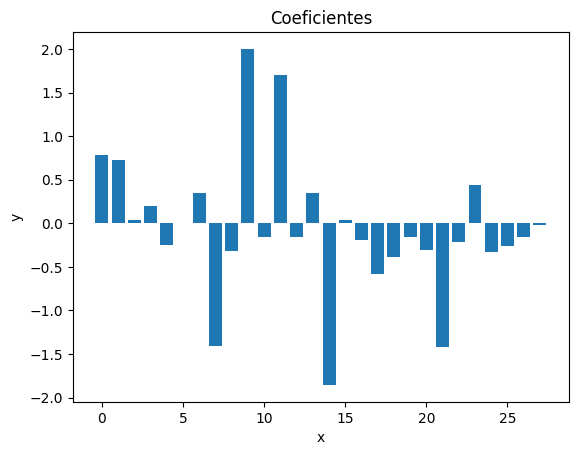

In [48]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [49]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.83147399, 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.82545003, 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.57765715, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.        , 0.62905427, 0.        , ..., 0.        , 0.        ,
        0.8       ],
       [0.73772446, 0.65312028, 0.72008851, ..., 0.        , 0.        ,
        0.8       ],
       [0.        , 0.66829268, 0.        , ..., 1.        , 0.        ,
        0.66666667]])

In [50]:
X_test.shape

(277, 28)

In [51]:
predictions = model.predict(X_test)

In [52]:
predictions

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [53]:
test["predicciones"]=predictions
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases,predicciones
0,0.000000,2.306973,0.000000,0.000000,0.000000,0.000000,0.000000,4.330794,0.001830,0.585814,...,4,0,15,1.000000,0.000000,0,0,0.333333,not_entailment,1
1,0.000000,2.290259,0.000000,0.000000,0.000000,0.000000,0.000000,4.222697,0.001304,0.741646,...,4,0,18,0.250000,0.000000,0,0,0.333333,entailment,0
2,0.000000,1.602743,0.000000,0.000000,0.000000,0.000000,0.000000,3.939812,0.000380,0.785368,...,7,0,69,0.857143,0.000000,0,0,0.500000,not_entailment,1
3,0.999998,1.868930,1.502919,3.943602,0.003980,0.200366,0.033212,4.294518,0.001715,0.591069,...,7,3,57,0.571429,0.083613,0,0,0.500000,not_entailment,0
4,0.000000,1.849475,0.000000,0.000000,0.000000,0.000000,0.000000,4.566742,0.001130,0.784733,...,7,0,15,0.714286,0.000000,0,0,0.750000,entailment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1.154425,2.073195,2.054585,3.941485,0.005496,0.333671,0.079486,4.650021,0.000689,0.888945,...,6,1,12,0.500000,0.326422,0,0,0.666667,entailment,1
273,0.000000,1.718790,0.000000,0.000000,0.000000,0.000000,0.000000,4.562471,0.000491,0.956359,...,6,0,25,0.500000,0.000000,0,0,0.333333,entailment,0
274,0.000000,1.745348,0.000000,0.000000,0.000000,0.000000,0.000000,3.795774,0.000000,0.800000,...,5,0,33,1.000000,0.000000,0,0,0.800000,entailment,1
275,0.999974,1.812120,1.738149,3.828442,0.005430,0.153807,0.024264,3.820542,0.000576,0.736258,...,7,1,13,0.142857,0.309501,0,0,0.800000,entailment,1


In [54]:
incorrectos = test[(test["clases"]=="entailment") & (test["predicciones"]==0)]
incorrectos

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases,predicciones
1,0.000000,2.290259,0.000000,0.000000e+00,0.000000,0.000000,0.000000,4.222697,0.001304,0.741646,...,4,0,18,0.250000,0.000000,0,0,0.333333,entailment,0
13,1.136002,1.753485,1.186873,2.030797e+00,0.020945,0.095471,0.016976,3.726632,0.006242,0.644962,...,7,2,26,0.714286,0.107837,0,0,0.666667,entailment,0
21,1.000010,0.958500,1.283012,3.761335e+00,0.004267,0.297322,0.023297,2.444534,0.001236,0.318929,...,5,2,62,0.600000,0.069050,0,0,0.333333,entailment,0
22,0.000000,1.286814,0.000000,0.000000e+00,0.000000,0.000000,0.000000,3.327687,0.000687,0.577440,...,4,0,69,0.500000,0.000000,1,0,0.666667,entailment,0
31,0.468001,1.373913,0.872682,1.861847e+00,0.002232,0.281002,0.037453,2.822052,0.001175,0.457296,...,6,2,61,0.833333,0.124345,0,0,0.750000,entailment,0
66,0.999982,1.834038,1.831462,3.876808e+00,0.005171,0.413178,0.098514,4.212543,0.002295,0.613601,...,5,2,14,0.600000,0.148535,0,0,0.333333,entailment,0
68,1.258195,1.918596,1.775549,3.986420e+00,0.004376,0.207643,0.086547,3.908248,0.003457,0.378308,...,6,2,12,0.500000,0.200166,0,0,0.000000,entailment,0
69,1.000007,1.735787,1.044845,3.918259e+00,0.004578,0.151556,0.018032,4.340861,0.001318,0.766425,...,4,1,50,0.750000,0.155179,0,0,0.333333,entailment,0
70,0.000000,1.424437,0.000000,1.521449e-12,0.000000,0.000000,0.000000,3.402825,0.000000,0.714286,...,7,1,20,0.714286,0.499926,0,0,1.000000,entailment,0
73,1.047722,2.665474,1.838247,3.956138e+00,0.004855,0.449294,0.083142,4.496293,0.000880,0.862323,...,8,2,37,0.750000,0.323232,1,0,0.750000,entailment,0


In [55]:
incorrectos.shape

(34, 30)

In [56]:
print(confusion_matrix(y_test, predictions))

[[ 66  65]
 [ 34 112]]


In [57]:
# [[[ 67  64]
# [ 33 113]]
# acccuracy:  0.65
# precision:  0.64
# recall 0.77
# f1_score:  0.7
# matthews_score:  0.3

In [58]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.64
precision:  0.63
recall 0.77
f1_score:  0.69
matthews_score:  0.28


In [61]:
X_train.shape

(2490, 20)

In [62]:
X_test.shape

(277, 20)

In [63]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [64]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [65]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

In [410]:
# Logistic Regression Acurracy:: 0.650000 (0.025704)
# Logistic Regression Precision:: 0.630000 (0.032616)
# Logistic Regression Recall:: 0.740000 (0.037576)
# Logistic Regression F1-score:: 0.680000 (0.025473)

In [75]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.660000 (0.019930)
Logistic Regression Recall:: 0.650000 (0.021086)
Logistic Regression F1-score:: 0.650000 (0.023758)


In [76]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.660000 (0.019464)
Logistic Regression Recall:: 0.650000 (0.021770)
Logistic Regression F1-score:: 0.650000 (0.023838)


In [77]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.650000 (0.021086)
Logistic Regression Recall:: 0.650000 (0.021086)
Logistic Regression F1-score:: 0.650000 (0.021086)


In [ ]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.310000 (0.054136)


In [59]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [60]:
#linear_model

In [60]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57       131
           1       0.63      0.77      0.69       146

    accuracy                           0.64       277
   macro avg       0.65      0.64      0.63       277
weighted avg       0.65      0.64      0.64       277



In [ ]:
#           precision    recall  f1-score   support

#            0       0.67      0.51      0.58       131
#            1       0.64      0.77      0.70       146

#     accuracy                           0.65       277
#    macro avg       0.65      0.64      0.64       277
# weighted avg       0.65      0.65      0.64       277

In [ ]:
#   
# precision    recall  f1-score   support

#            0       0.58      0.53      0.55       131
#            1       0.61      0.66      0.63       146

#     accuracy                           0.60       277
#    macro avg       0.59      0.59      0.59       277
# weighted avg       0.59      0.60      0.59       277
#precision    recall  f1-score   support

#            0       0.64      0.57      0.60       131
#            1       0.65      0.71      0.68       146

#     accuracy                           0.64       277
#    macro avg       0.64      0.64      0.64       277
# weighted avg       0.64      0.64      0.64       277

In [61]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [62]:
test.columns[:-1]

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'negH', 'overlap_ent', 'clases'],
      dtype='object')

In [63]:
explainer.expected_value

-0.03518414936770853

In [64]:
X_test

array([[0.        , 0.83147399, 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.82545003, 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.57765715, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.        , 0.62905427, 0.        , ..., 0.        , 0.        ,
        0.8       ],
       [0.73772446, 0.65312028, 0.72008851, ..., 0.        , 0.        ,
        0.8       ],
       [0.        , 0.66829268, 0.        , ..., 1.        , 0.        ,
        0.66666667]])

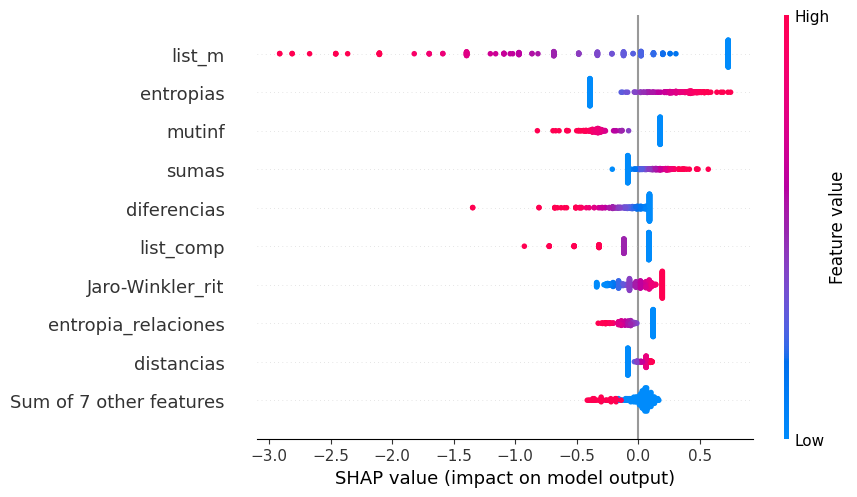

In [ ]:
shap.plots.beeswarm(shap_values)

In [576]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.75057232 0.50345916 0.87287363 0.1108515  0.61865825 0.68580828
 0.         0.04032258 0.         0.61260162 0.46666667 0.5210084
 0.6        0.         0.         0.33333333] 1 0


IndexError: index 16 is out of bounds for axis 0 with size 16

In [577]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.3697479 1.        0.
 0.        0.5      ]


IndexError: index 1 is out of bounds for axis 2 with size 1

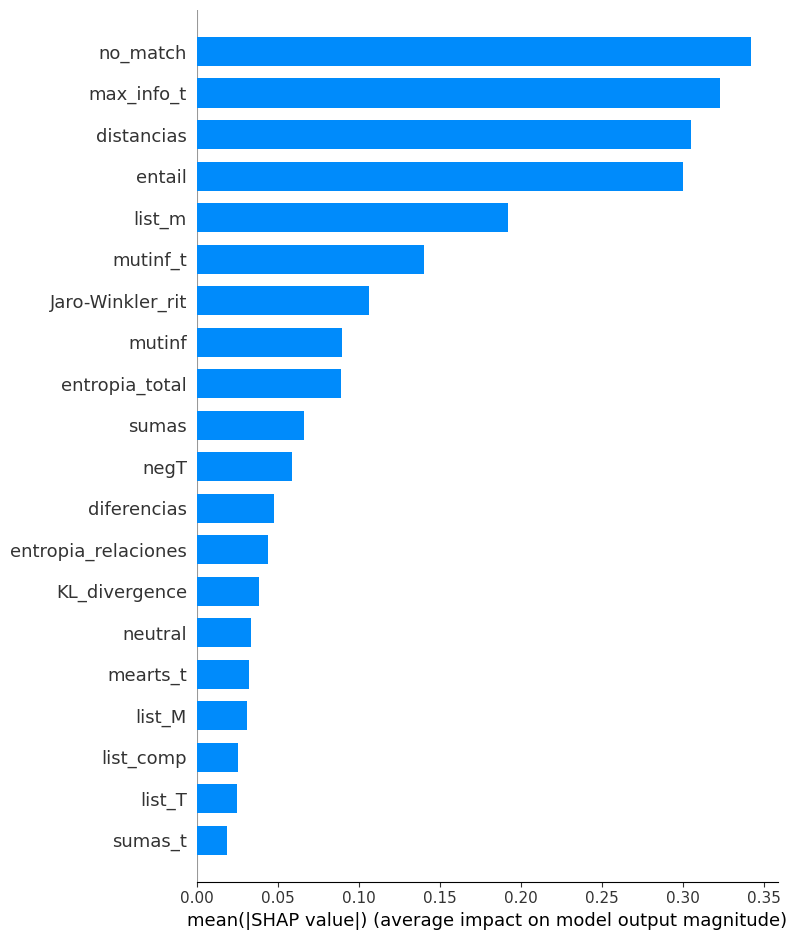

In [65]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

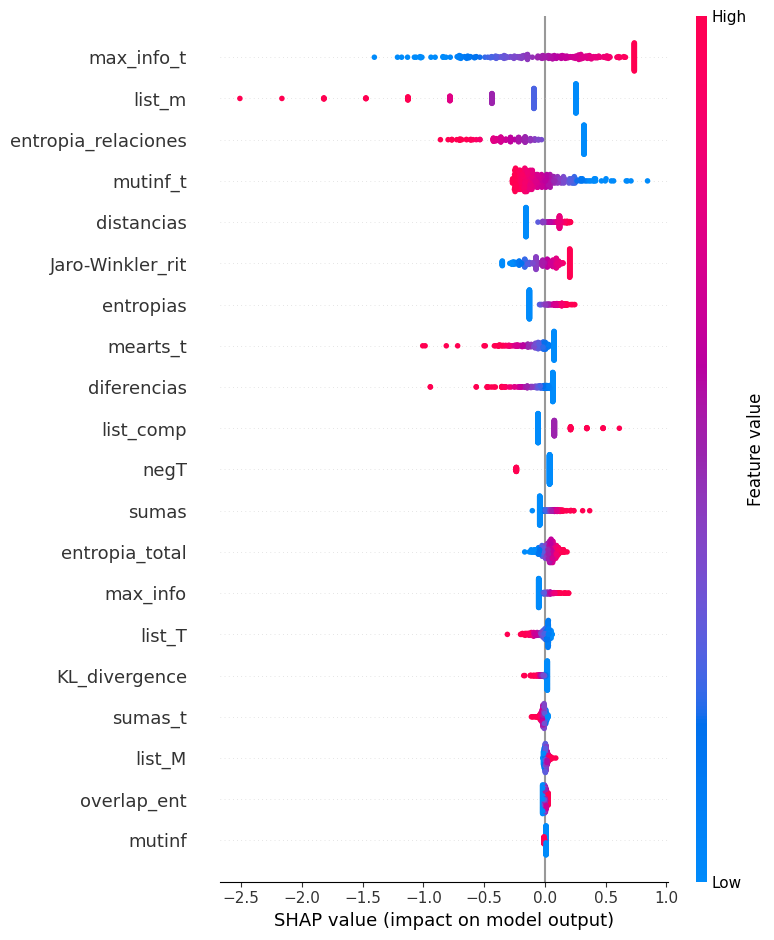

In [425]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

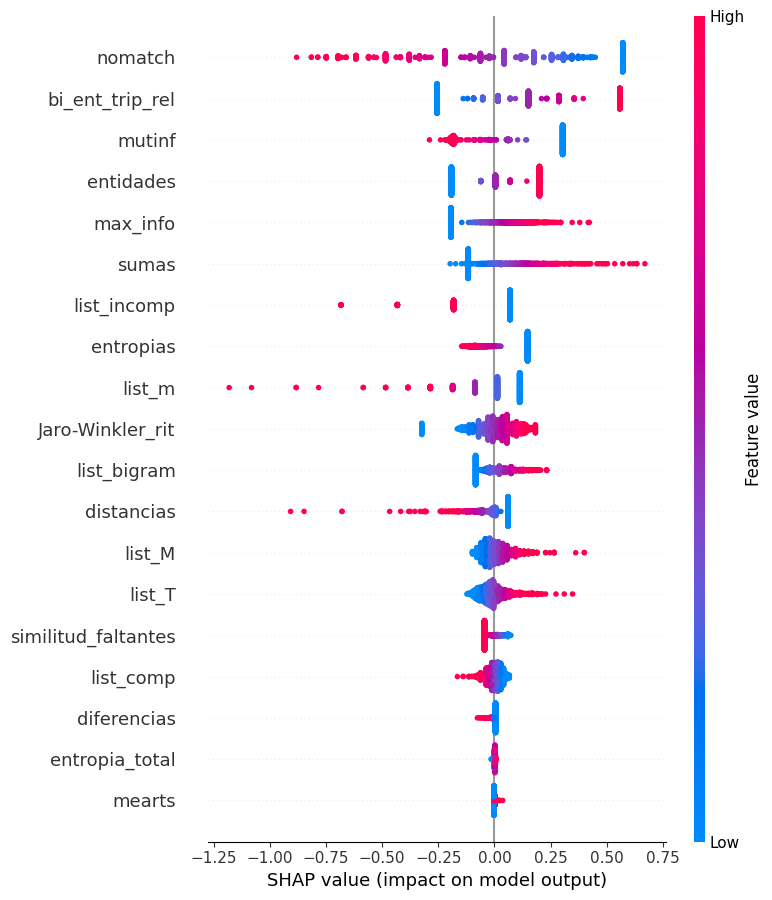

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

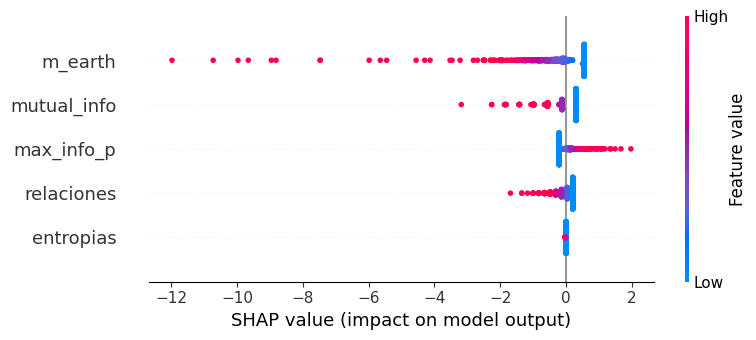

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


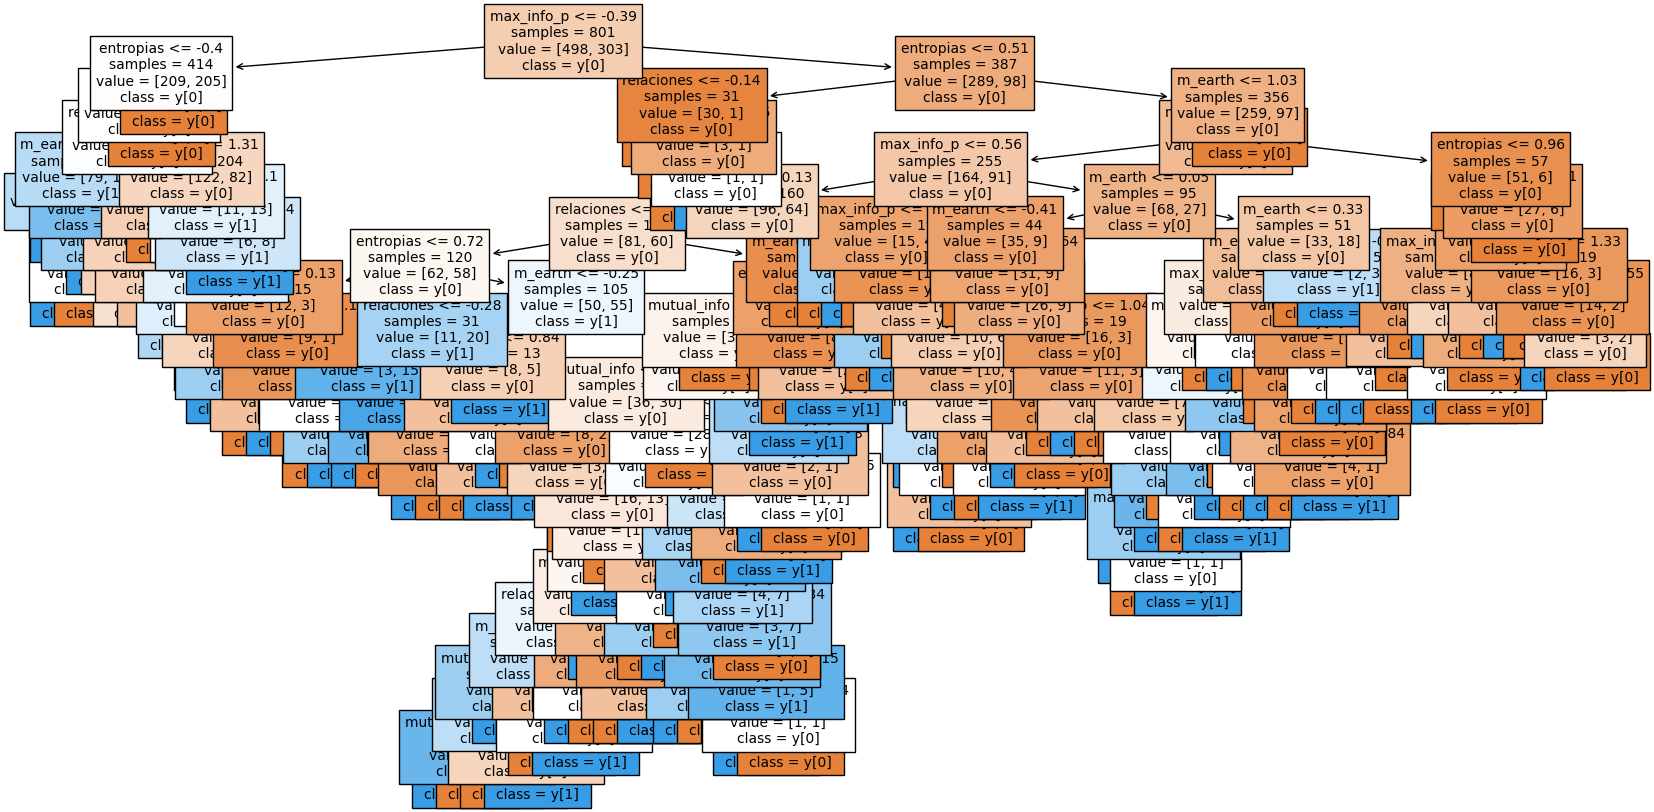

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )